In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav
from scipy.signal import find_peaks
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
import math
from matplotlib import cm
from astropy.wcs import WCS
import scipy
import scipy.ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import pkg_resources
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling import models
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from __future__ import print_function
import pyspeckit
import pylab as pl

In [2]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')
hdu1 = fits.open(filename)[0]

In [3]:
def integrated_intensity(source = 'HCN', globule = 'GloB'):
    
    path = globule + '_' + source + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header
    #print(header)
    
    data1 = data[0,:,:,:]

    plt.figure(figsize=[10,10])
    
    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    array = [11, 12, 13, 14, 15, 16, 17]

    integrated1 = np.sum(data1[array, :, :], axis = 0) 
    extent=[ra[0],ra[-1],dec[0],dec[-1]]
    print(integrated1.shape)
    
    if source == '12CO':
        if globule == 'GlobB':
            d = 0.25
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.42934971                                                 
            hdu1.header['CDELT1'] = -5e-05                                                  
            hdu1.header['CRPIX1'] = 126.0                                                 
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -20.81741516796                                                  
            hdu1.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu1.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 250                                                  
            hdu1.header['NAXIS2'] = 250
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
            hdu1.header['BSCALE'] =  1.0
            hdu1.header['BZERO'] = 0.000000000000E+00
            hdu1.header['LATPOLE'] = -2.081741516796E+01
        else:
            d = 0.07
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4074166667
            hdu1.header['CDELT1'] = -2.5e-05
            hdu1.header['CRPIX1'] = 316.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.8
            hdu1.header['CDELT2'] = 2.5e-05
            hdu1.header['CRPIX2'] = 316.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 630
            hdu1.header['NAXIS2'] = 630
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source == '13CO':
        if globule == 'GlobB':
            d = 0.25
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 3.374293497100E+02                                                  
            hdu1.header['CDELT1'] = -5.000000000000E-05                                                  
            hdu1.header['CRPIX1'] = 1.260000000000E+02                                                  
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -2.081741516796E+01                                                  
            hdu1.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu1.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 250                                                  
            hdu1.header['NAXIS2'] = 250
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d = 0.1
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4074166667
            hdu1.header['CDELT1'] = -2.5e-05
            hdu1.header['CRPIX1'] = 316.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.8
            hdu1.header['CDELT2'] = 2.5e-05
            hdu1.header['CRPIX2'] = 316.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 630
            hdu1.header['NAXIS2'] = 630
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source == 'C18O':
        if globule == 'GlobB':
            d = 0.28
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.42934971                                               
            hdu1.header['CDELT1'] = -5e-05                                                  
            hdu1.header['CRPIX1'] = 126.0                                                 
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -20.81741516796                                                  
            hdu1.header['CDELT2'] = 5.000000000000E-05                                                  
            hdu1.header['CRPIX2'] = 1.260000000000E+02                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 250                                                  
            hdu1.header['NAXIS2'] = 250
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d = 0.15
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4074166667
            hdu1.header['CDELT1'] = -2.5e-05
            hdu1.header['CRPIX1'] = 316.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.8
            hdu1.header['CDELT2'] = 2.5e-05
            hdu1.header['CRPIX2'] = 316.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 630
            hdu1.header['NAXIS2'] = 630
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 4.2.2 (prerelease r30986)' 
    elif source == 'CCH':
        if globule == 'GlobB':
            d = 0.25
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4293456831                                                 
            hdu1.header['CDELT1'] = -4.722222222222e-05                                                  
            hdu1.header['CRPIX1'] = 301.0                                                 
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -20.81741557774                                                 
            hdu1.header['CDELT2'] = 4.722222222222e-05                                                 
            hdu1.header['CRPIX2'] = 301.0                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600                                                  
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d = 0.15
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 301.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071455
            hdu1.header['CDELT2'] = 4.722222222222e-05
            hdu1.header['CRPIX2'] = 301.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source == 'CCH_32':
        if globule == 'GlobB':
            d = 0.15
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4293501741                                                  
            hdu1.header['CDELT1'] = -3.611111111111e-05                                                 
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -20.81741515042                                                  
            hdu1.header['CDELT2'] = 3.611111111111e-05                                                  
            hdu1.header['CRPIX2'] = 151.0                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300                                                 
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d = 0.08
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -3.333333333333e-05
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071196
            hdu1.header['CDELT2'] = 3.333333333333e-05
            hdu1.header['CRPIX2'] = 151.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source == 'HC3N':
        if globule == 'GlobB':
            d = 0.3
            hdu1.header['CTYPE1'] = 'RA---SIN'
            hdu1.header['CRVAL1'] = 337.4293456831                                                  
            hdu1.header['CDELT1'] = -4.722222222222e-05                                                 
            hdu1.header['CRPIX1'] = 301.0                                                  
            hdu1.header['CUNIT1'] = 'deg'                                                            
            hdu1.header['CTYPE2'] = 'DEC--SIN'                                                            
            hdu1.header['CRVAL2'] = -20.81741557774                                                  
            hdu1.header['CDELT2'] = 4.722222222222e-05                                                  
            hdu1.header['CRPIX2'] = 301.0                                                  
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600                                                  
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d = 0.25
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 301.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071455
            hdu1.header['CDELT2'] = 4.722222222222e-05
            hdu1.header['CRPIX2'] = 301.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source == 'HCN':
        if globule == 'GlobB':
            d = 0.06
            hdu1.header['CTYPE1'] = 'RA---SIN'  
            hdu1.header['CRVAL1'] = 337.4293456831 
            hdu1.header['CDELT1'] = -4.722222222222E-05
            hdu1.header['CRPIX1'] = 3.010000000000E+02
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -2.081741557774E+01 
            hdu1.header['CDELT2'] = 4.722222222222E-05
            hdu1.header['CRPIX2'] = 3.010000000000E+02 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4' 

        else:
            d = 0.08
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 301.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071455
            hdu1.header['CDELT2'] = 4.722222222222e-05
            hdu1.header['CRPIX2'] = 301.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source == 'HCN_32':
        if globule == 'GlobB':
            d = 0.065
            hdu1.header['CTYPE1'] = 'RA---SIN'        
            hdu1.header['CRVAL1'] = 337.4293501741
            hdu1.header['CDELT1'] = -3.611111111111e-05
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.81741515042 
            hdu1.header['CDELT2'] = 3.611111111111e-05
            hdu1.header['CRPIX2'] = 151.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.4.0-70'
        else:
            d = 0.04
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -3.333333333333e-05
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071196
            hdu1.header['CDELT2'] = 3.333333333333e-05
            hdu1.header['CRPIX2'] = 151.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source == 'HCOp':
        if globule == 'GlobB':
            d = 0.08
            hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu1.header['CRVAL1'] = 337.4293456831
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 3.010000000000E+02
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.81741557774 
            hdu1.header['CDELT2'] = 4.722222222222E-05
            hdu1.header['CRPIX2'] = 3.010000000000E+02 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d = 0.1
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 301.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071455
            hdu1.header['CDELT2'] = 4.722222222222e-05
            hdu1.header['CRPIX2'] = 301.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source == 'HCOp_32':
        if globule == 'GlobB':
            d = 0.1
            hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu1.header['CRVAL1'] = 337.4293502177
            hdu1.header['CDELT1'] = -3.888888888889e-05
            hdu1.header['CRPIX1'] = 101.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.81741514942 
            hdu1.header['CDELT2'] = 3.888888888889e-05
            hdu1.header['CRPIX2'] = 101.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 200
            hdu1.header['NAXIS2'] = 200
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
        else:
            d = 0.08
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.4076835305
            hdu1.header['CDELT1'] = -3.333333333333e-05
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947070536
            hdu1.header['CDELT2'] = 3.333333333333e-05
            hdu1.header['CRPIX2'] = 151.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
    elif source == 'HNC':
        if globule == 'GlobB':
            d = 0.3
            hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu1.header['CRVAL1'] = 337.4293456831
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 3.010000000000E+02
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.81741557774 
            hdu1.header['CDELT2'] = 4.722222222222E-05
            hdu1.header['CRPIX2'] = 3.010000000000E+02 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d = 0.08
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.407684391
            hdu1.header['CDELT1'] = -4.722222222222e-05
            hdu1.header['CRPIX1'] = 301.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947071455
            hdu1.header['CDELT2'] = 4.722222222222e-05
            hdu1.header['CRPIX2'] = 301.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 600
            hdu1.header['NAXIS2'] = 600
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.6.1-8'
    elif source == 'HNC_32':
        if globule == 'GlobB':
            d = 0.2
            hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
            hdu1.header['CRVAL1'] = 337.4293502177
            hdu1.header['CDELT1'] = -3.888888888889e-05
            hdu1.header['CRPIX1'] = 101.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.81741514942 
            hdu1.header['CDELT2'] = 3.888888888889e-05
            hdu1.header['CRPIX2'] = 101.0
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 200
            hdu1.header['NAXIS2'] = 200
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4' 
        else:
            d = 0.12
            hdu1.header['CTYPE1'] = 'RA---SIN' 
            hdu1.header['CRVAL1'] = 337.4076835305
            hdu1.header['CDELT1'] = -3.333333333333e-05
            hdu1.header['CRPIX1'] = 151.0
            hdu1.header['CUNIT1'] = 'deg'
            hdu1.header['CTYPE2'] = 'DEC--SIN'
            hdu1.header['CRVAL2'] = -20.79947070536
            hdu1.header['CDELT2'] = 3.333333333333e-05
            hdu1.header['CRPIX2'] = 151.0 
            hdu1.header['CUNIT2'] = 'deg'
            hdu1.header['NAXIS1'] = 300
            hdu1.header['NAXIS2'] = 300
            hdu1.header['BITPIX'] = -32
            hdu1.header['LONPOLE'] = 1.800000000000E+02 
            hdu1.header['BUNIT'] = 'Jy/beam'
            hdu1.header['TELESCOP'] = 'ALMA'
            hdu1.header['INSTRUME'] = 'ALMA'
            hdu1.header['ORIGIN'] = 'CASA 5.1.2-4'
            
    #print(hdu1.header)
    wcs = WCS(hdu1.header)
    print(wcs)
    
    #sigma_mask = sigma_clip(integrated1, sigma=2, maxiters=None, cenfunc='mean')
    #newmask = (integrated1 < np.amax(sigma_mask))
    
    #mom0 = np.ma.array(integrated1, mask = newmask)*abs(vel_inc)
    
    plt.subplot(projection=wcs)
    plt.imshow(integrated1, origin = 'lower')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('RA',fontsize=14)
    plt.ylabel('DEC',fontsize=14)
    plt.colorbar(label = r'Integrated Instensity (Jy/Beam km/s)', fraction=0.048, pad=0.04)
    plt.title(source + ' Integrated Intensity', fontsize= 20)
    plt.grid(color = 'white')
    plt.show()

(250, 250)
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 337.42934971  -20.81741516796  
CRPIX : 126.0  126.0  
NAXIS : 250  250


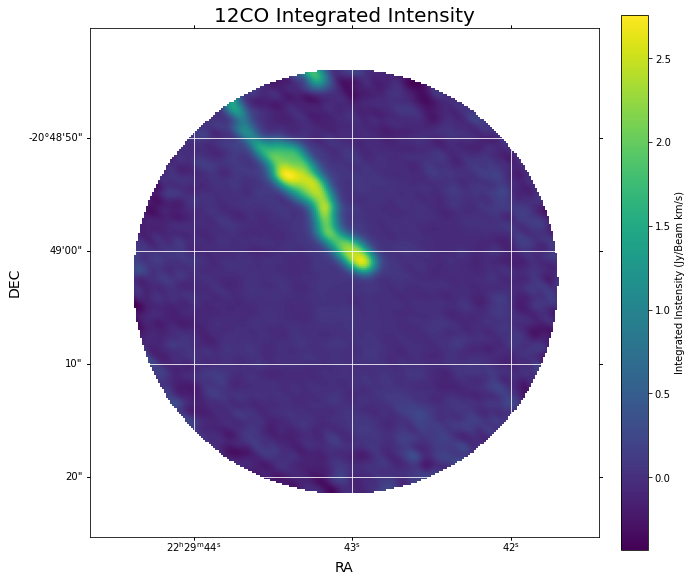

(600, 600)
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 337.4293456831  -20.81741557774  
CRPIX : 301.0  301.0  
NAXIS : 600  600


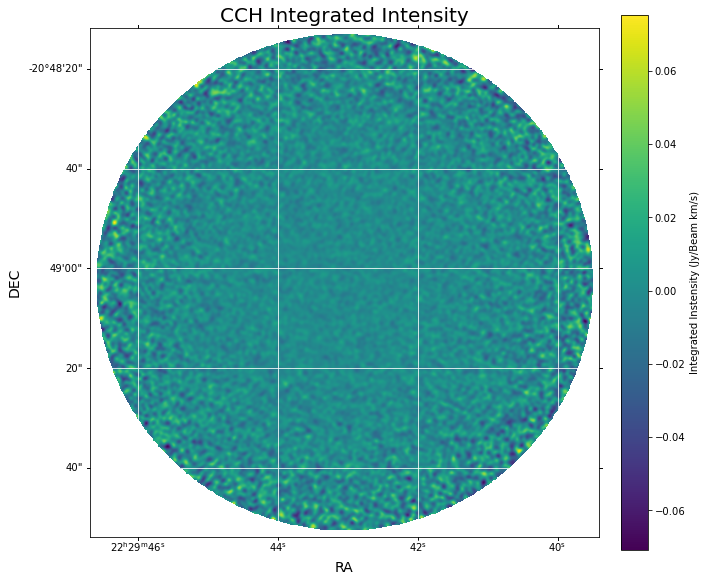

In [71]:
integrated_intensity(source = '12CO', globule = 'GlobB')
#integrated_intensity(source = '13CO', globule = 'GlobB')
#integrated_intensity(source = 'C18O', globule = 'GlobC')
integrated_intensity(source = 'CCH', globule = 'GlobB')
#integrated_intensity(source = 'CCH_32', globule = 'GlobB')
#integrated_intensity(source = 'HC3N', globule = 'GlobB')
#integrated_intensity(source = 'HCN', globule = 'GlobC')
#integrated_intensity(source = 'HCN_32', globule = 'GlobC')
#integrated_intensity(source = 'HCOp', globule = 'GlobC')
#integrated_intensity(source = 'HCOp_32', globule = 'GlobC')
#integrated_intensity(source = 'HNC', globule = 'GlobC')
#integrated_intensity(source = 'HNC_32', globule = 'GlobC')

SIMPLE  =                    T                                                  BITPIX  =                  -64                                                  NAXIS   =                    2                                                  NAXIS1  =                  149                                                  NAXIS2  =                  149                                                  EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H CRPIX1  =               75.907                                                  CRVAL1  =                   0.                                                  CDELT1  =      -0.006666666828                                                  CTYPE1  = 'GLON-CAR'                                                            CRPIX2  =              74.8485          

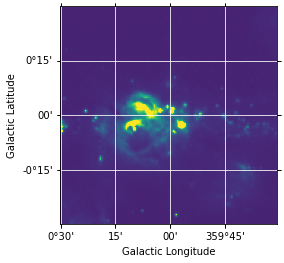

In [36]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
print(hdu.header)
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')